## (I) Initialization and Read Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8*1.5, 4.0*1.5) # set default size of plots

In [2]:
dataPath = './ClassifyTripType/'
trainData = pd.read_csv(dataPath + 'train.csv', dtype={'Upc': object, 'FinelineNumber': object})
testData = pd.read_csv(dataPath + 'test.csv', dtype={'Upc': object, 'FinelineNumber': object})

## (II) A Glance at the Dataset

### Group

In [3]:
grouped = trainData.groupby('VisitNumber')
grouped.get_group(8)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017
5,26,8,Friday,2006618783,2,PAINT AND ACCESSORIES,1017
6,26,8,Friday,2006613743,1,PAINT AND ACCESSORIES,1017
7,26,8,Friday,7004802737,1,PAINT AND ACCESSORIES,2802
8,26,8,Friday,2238495318,1,PAINT AND ACCESSORIES,4501
9,26,8,Friday,2238400200,-1,PAINT AND ACCESSORIES,3565
10,26,8,Friday,5200010239,1,DSD GROCERY,4606
11,26,8,Friday,88679300501,2,PAINT AND ACCESSORIES,3504
12,26,8,Friday,22006000000,1,MEAT - FRESH & FROZEN,6009


### Comparison of training and test data in how many unique items of each column there are

In [4]:
trainUnique = np.array([[x, len(trainData[x].unique())] for x in ['TripType', 'VisitNumber', 'Weekday', 'Upc', 'DepartmentDescription', 'FinelineNumber']])
testUnique = np.array([[x, len(testData[x].unique())] for x in ['VisitNumber', 'Weekday', 'Upc', 'DepartmentDescription', 'FinelineNumber']])
print(trainUnique)
print(testUnique)

[['TripType' '38']
 ['VisitNumber' '95674']
 ['Weekday' '7']
 ['Upc' '97715']
 ['DepartmentDescription' '69']
 ['FinelineNumber' '5196']]
[['VisitNumber' '95674']
 ['Weekday' '7']
 ['Upc' '98148']
 ['DepartmentDescription' '68']
 ['FinelineNumber' '5204']]


### Prior distribution of $\mathtt{TripType}$ in training set

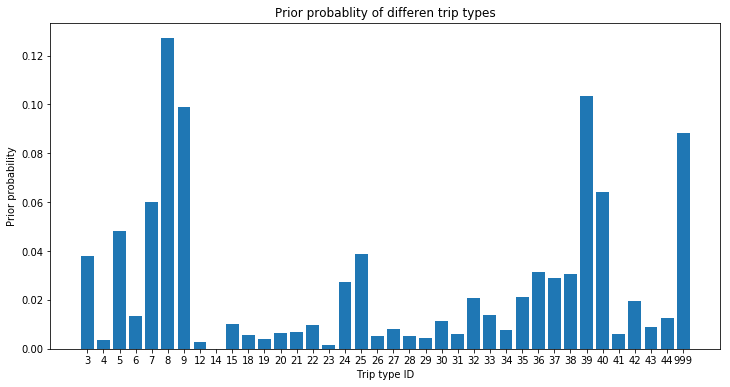

In [5]:
trip_types = trainData[['VisitNumber', 'TripType']].drop_duplicates()
trip_types_counts = trip_types['TripType'].value_counts().sort_index()

x = range(1, len(trip_types_counts) + 1)
y = trip_types_counts.values
plt.bar(x, y / np.sum(y))
plt.xticks(x,trip_types_counts.index)
plt.title('Prior probablity of differen trip types')
plt.xlabel('Trip type ID')
plt.ylabel('Prior probability') 
plt.savefig('./experimental results/eda/prior.eps')
plt.show()

### The most frequently bought items ($\mathtt{FinelineNumber}$) of each trip type

In [4]:
pd.crosstab(index=trainData['FinelineNumber'], columns=trainData['TripType']).idxmax()

TripType
3       277
4      1110
5      5501
6      8012
7      8014
8       808
9      1805
12       31
14     7949
15     1805
18     5330
19     1264
20     3004
21     3550
22     9640
23      818
24     8103
25      324
26     9803
27     5501
28     5805
29     6110
30      135
31     9998
32     3175
33     8945
34     1946
35      808
36      203
37     5501
38     1508
39     5501
40     5501
41      135
42     1805
43        0
44        0
999     279
dtype: object

### Intersection and union of $\mathtt{FinlineNumber}$ and $\mathtt{DepartmentDescription}$ in training and test set

In [115]:
testFNSet = set(testData.FinelineNumber.unique())
trainFNSet = set(trainData.FinelineNumber.unique())
print(len(testFNSet), len(trainFNSet), len(testFNSet | trainFNSet))

5204 5196 5355


In [126]:
testDDSet = set(testData.DepartmentDescription.unique())
trainDDSet = set(trainData.DepartmentDescription.unique())
print(len(testDDSet), len(trainDDSet))
print(trainDDSet - testDDSet)
print(trainDDSet)

68 69
{'HEALTH AND BEAUTY AIDS'}
{nan, 'SHEER HOSIERY', 'WIRELESS', 'LADIESWEAR', 'SPORTING GOODS', 'OTHER DEPARTMENTS', 'FROZEN FOODS', 'OPTICAL - FRAMES', 'BOOKS AND MAGAZINES', 'OFFICE SUPPLIES', 'COMM BREAD', 'GIRLS WEAR, 4-6X  AND 7-14', 'PRE PACKED DELI', 'SHOES', 'HOUSEHOLD PAPER GOODS', 'OPTICAL - LENSES', 'ACCESSORIES', 'IMPULSE MERCHANDISE', 'LIQUOR,WINE,BEER', 'SWIMWEAR/OUTERWEAR', 'SLEEPWEAR/FOUNDATIONS', 'HEALTH AND BEAUTY AIDS', 'INFANT CONSUMABLE HARDLINES', 'DSD GROCERY', 'SEASONAL', 'MENSWEAR', 'MENS WEAR', 'PLUS AND MATERNITY', 'BOYS WEAR', 'HOUSEHOLD CHEMICALS/SUPP', 'HARDWARE', 'BATH AND SHOWER', 'BRAS & SHAPEWEAR', 'MEDIA AND GAMING', 'TOYS', 'HOME DECOR', 'CAMERAS AND SUPPLIES', 'INFANT APPAREL', '1-HR PHOTO', 'BEDDING', 'CELEBRATION', 'GROCERY DRY GOODS', 'PERSONAL CARE', 'PAINT AND ACCESSORIES', 'DAIRY', 'COOK AND DINE', 'BAKERY', 'HORTICULTURE AND ACCESS', 'FURNITURE', 'CANDY, TOBACCO, COOKIES', 'JEWELRY AND SUNGLASSES', 'LAWN AND GARDEN', 'HOME MANAGEMENT', 'E

### Missing data
- DepartmentDescription为NULL，则UPC和FLN一定为NULL
- UPC和FLN为NULL时，DepartmentDescription非NULL即PHARMACY RX (反之Department为PHARMACY RX时，UPC和FLN不一定为NULL)
- 因为处方药大部分没有UPC？

In [20]:
trainData.isnull().sum()

TripType                    0
VisitNumber                 0
Weekday                     0
Upc                      4129
ScanCount                   0
DepartmentDescription    1361
FinelineNumber           4129
dtype: int64

In [23]:
trData = trainData.dropna()
trData.isnull().sum()

TripType                 0
VisitNumber              0
Weekday                  0
Upc                      0
ScanCount                0
DepartmentDescription    0
FinelineNumber           0
dtype: int64